# **The Titanic Survivor**

**Background**

The sinking of the RMS Titanic is one of the most well-known maritime disasters in history. On April 15, 1912, the Titanic collided with an iceberg and sank, resulting in the loss of a significant number of lives. The incident highlighted the need for improved safety measures and prompted changes in maritime regulations.

The Titanic survivors dataset is a widely-used dataset that provides valuable information about the passengers aboard the Titanic, including their demographics, ticket details, and survival outcomes. This dataset has become a popular resource for exploring and analyzing the factors that influenced the survival of passengers on that fateful voyage.



# **Features Description**
PassengerId: Unique identifier for each passenger

Survived: Whether the passenger survived (0 = No, 1 = Yes)

Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

Name: Passenger's name

Sex: Passenger's gender (male or female)

Age: Passenger's age in years

SibSp: Number of siblings/spouses aboard the Titanic

Parch: Number of parents/children aboard the Titanic

Ticket: Ticket number

Fare: Fare paid for the ticket

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [18]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [19]:
path = '/gdrive/My Drive/'

In [20]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import dataset
df = pd.read_csv(path + 'titanic/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
df.shape

(418, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [24]:
# checking nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:
mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=mean_c3, inplace=True)

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print("The mean age of Miss title: ",mean_age_miss)
print("The mean age of Mrs title: ",mean_age_mrs)
print("The mean age of Mr title: ",mean_age_mr)
print("The mean age of Master: ",mean_age_master)

The mean age of Miss title:  22.0
The mean age of Mrs title:  39.0
The mean age of Mr title:  34.0
The mean age of Master:  7.0


In [31]:
def filling_age(name_age):
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
df['Age'] = df[['Name', 'Age']].apply(filling_age,axis=1)

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [33]:
df.drop(['Cabin'], axis=1, inplace=True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,34.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,34.0,0,0,8.0500,S


In [36]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

In [37]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [38]:
# put the categorical Featurs in dataframe
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,34.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,34.0,0,0,8.0500,S


In [40]:
# make the dataframe attributes realted to each other
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

new_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1)

new_df.drop(['Embarked'], axis=1, inplace=True)

In [41]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,0,34.0,0,0,8.0500,0,1
414,1,1,1,39.0,0,0,108.9000,0,0
415,0,3,0,38.5,0,0,7.2500,0,1
416,0,3,0,34.0,0,0,8.0500,0,1


In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Q         418 non-null    uint8  
 8   S         418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


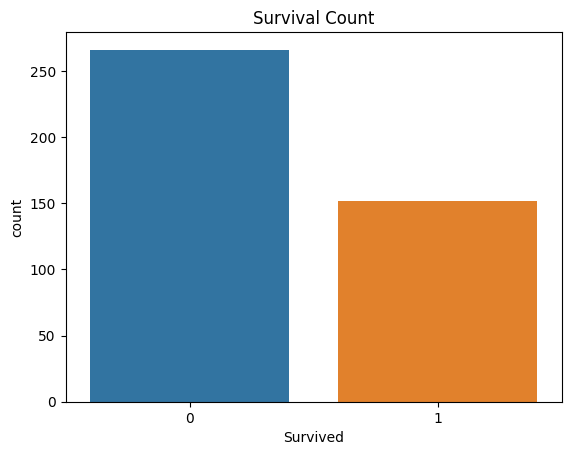

In [43]:
# Exploring the target variable
sns.countplot(x='Survived', data=new_df)
plt.title('Survival Count')
plt.show()

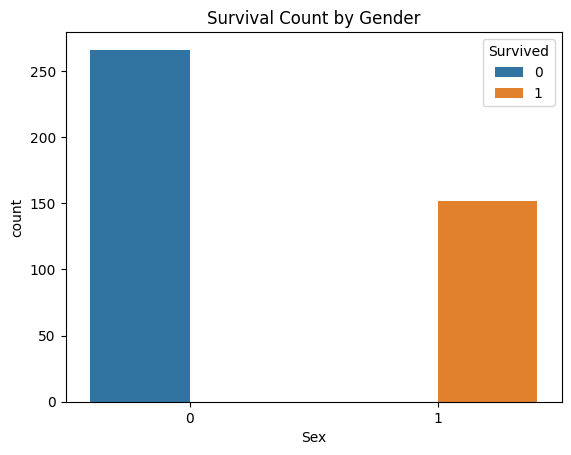

In [44]:
# Exploring categorical variables
sns.countplot(x='Sex', hue='Survived', data=new_df)
plt.title('Survival Count by Gender')
plt.show()

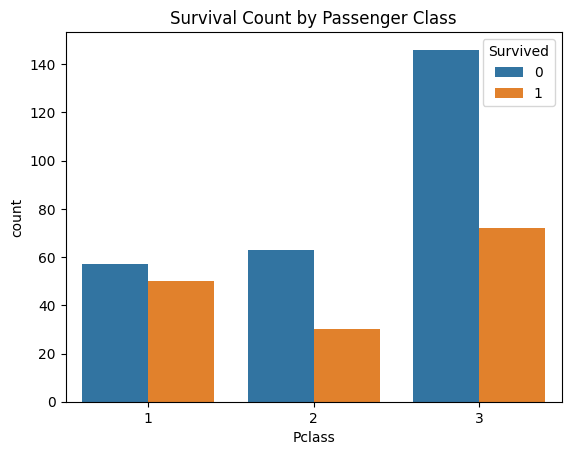

In [45]:
sns.countplot(x='Pclass', hue='Survived', data=new_df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [46]:
corr = new_df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Pclass,-0.108615,1.000000,-0.108615,-0.436823,0.001087,0.018721,-0.577368,0.252608,0.120783
Sex,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Age,-0.025462,-0.436823,-0.025462,1.000000,-0.104316,-0.036099,0.309443,-0.049533,-0.113734
SibSp,0.099943,0.001087,0.099943,-0.104316,1.000000,0.306895,0.171949,-0.098824,0.079367
Parch,0.159120,0.018721,0.159120,-0.036099,0.306895,1.000000,0.230352,-0.132948,0.092201
Fare,0.192094,-0.577368,0.192094,0.309443,0.171949,0.230352,1.000000,-0.155157,-0.179163
Q,0.115574,0.252608,0.115574,-0.049533,-0.098824,-0.132948,-0.155157,1.000000,-0.474962
S,-0.105883,0.120783,-0.105883,-0.113734,0.079367,0.092201,-0.179163,-0.474962,1.000000


<Axes: >

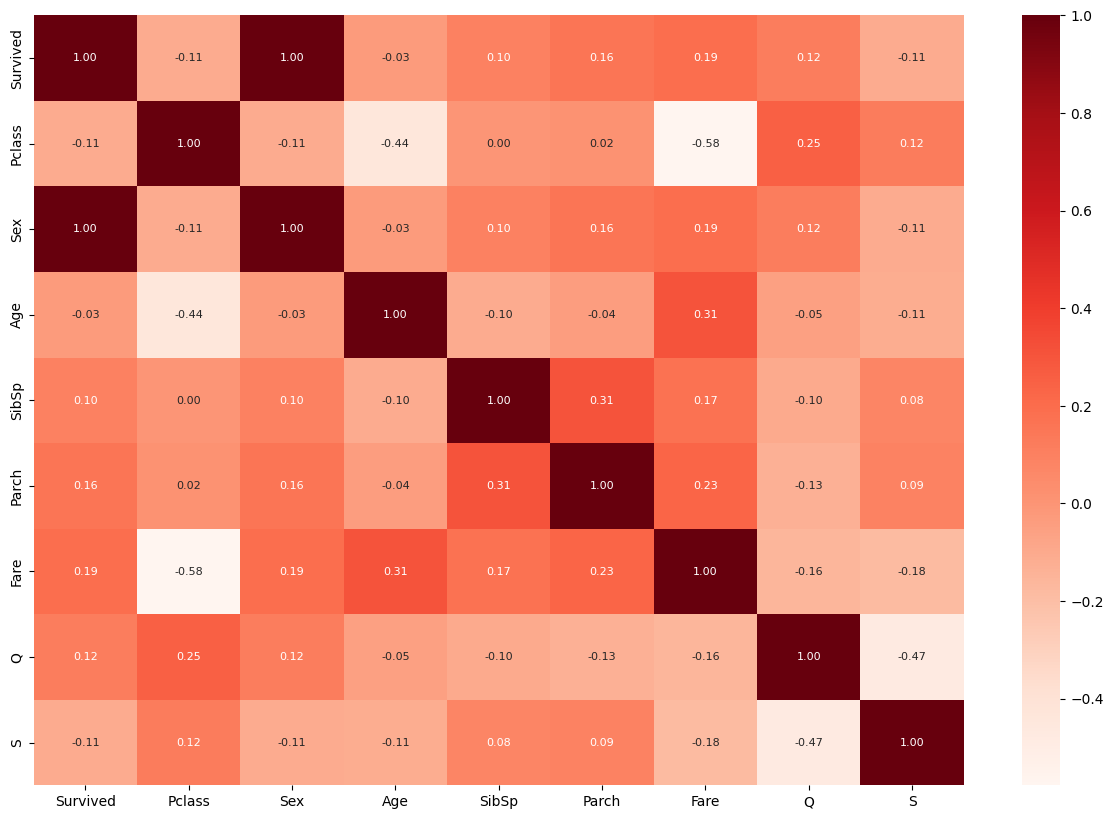

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Reds')

we can clearly notice that the Sex attribute has a completly strong positive correlation (100%) with the target column so we have to drop it to avoid overfitting in our model

In [48]:
new_df.drop(['Sex'], axis=1, inplace=True)

Now let's look to our data distribution

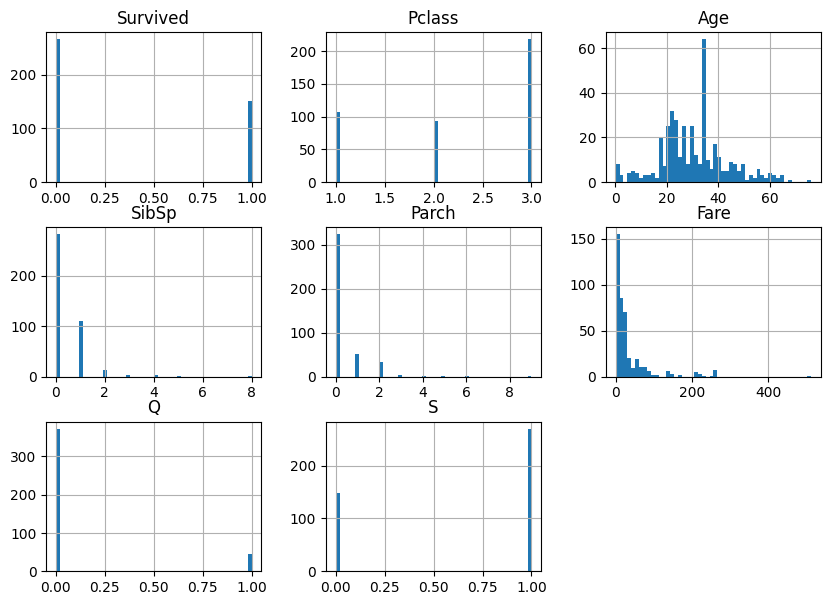

In [49]:
new_df.hist(bins=50, figsize=(10,7))
plt.show()

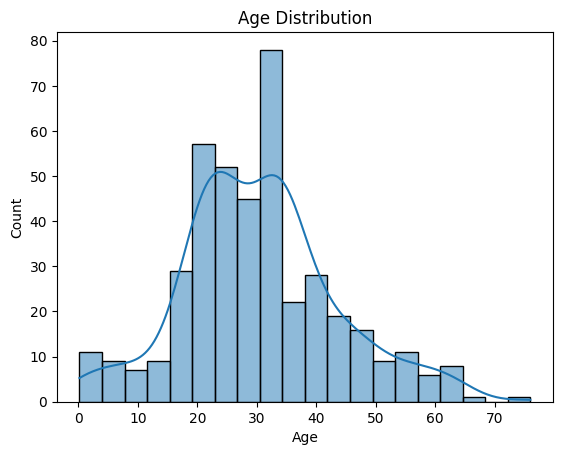

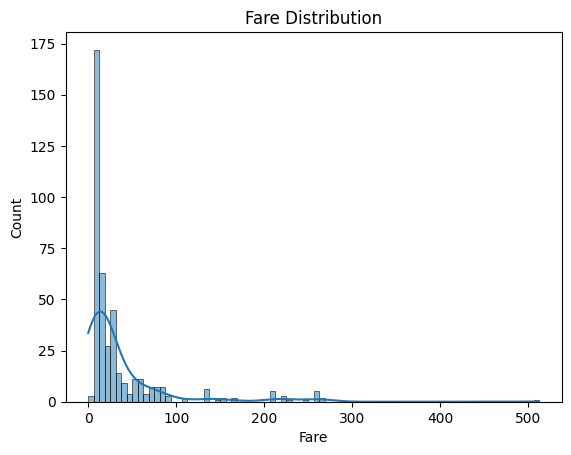

In [50]:
# Clearer histogram plots for the Age and  Fare columns
sns.histplot(x='Age', data=new_df, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Fare', data=new_df, kde=True)
plt.title('Fare Distribution')
plt.show()

from the plots above we can see that the Fare attribute rightly skewed and has outliers


## **Removing Outliers**

Actually I searched in Chat-GPT for a way to remove outliers and found The IQR method , In a brief we will calculate the 25th percentile (for lower values) and the 75th percentile (for higher values) and then remove the the values below than 25th percentile & above than 75th percentile , code above will explain my words more clearly:

In [51]:
# Calculate IQR
q1 = new_df['Fare'].quantile(0.25)
q3 = new_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Define range
lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

# Identify outliers
outlier_indices = new_df[(new_df['Fare'] < lower_range) | (new_df['Fare'] > upper_range)].index

# Remove outliers

cleaned_df = new_df.drop(outlier_indices)

# **Split Data**

In [52]:
## importing modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = cleaned_df.drop(['Survived'], axis=1)
y = cleaned_df['Survived']

In [54]:
X

,Pclass,Age,SibSp,Parch,Fare,Q,S
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,1,0
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...
412,3,28.0,0,0,7.7750,0,1
413,3,34.0,0,0,8.0500,0,1
415,3,38.5,0,0,7.2500,0,1
416,3,34.0,0,0,8.0500,0,1


In [55]:
y

0      0
1      1
2      0
3      0
4      1
      ..
412    1
413    0
415    0
416    0
417    0
Name: Survived, Length: 363, dtype: int64

In [56]:
## Data normalization
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
X = pd.DataFrame(mns.fit_transform(X), columns=X.columns)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

## **Training the Model**

Random Forest Classifier

In [58]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
rf.fit(X_train, y_train)
print('Training score: ', round(rf.score(X_train, y_train),3))
print('Testing score: ', round(rf.score(X_test, y_test),3))

Training score:  0.846
Testing score:  0.716


Logistic Regression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Training score: ', round(logreg.score(X_train, y_train),3))
print('Testing score: ', round(logreg.score(X_test, y_test),3))

Training score:  0.689
Testing score:  0.615


SVM

In [60]:
svm = SVC()
svm.fit(X_train, y_train)
print('Training score: ', round(svm.score(X_train, y_train),3))
print('Testing score: ', round(svm.score(X_test, y_test),3))

Training score:  0.693
Testing score:  0.587


K-Neighbors Classifier

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Training score: ', round(knn.score(X_train, y_train),3))
print('Testing score: ', round(knn.score(X_test, y_test),3))

Training score:  0.78
Testing score:  0.734
